<a href="https://colab.research.google.com/github/julianovale/lean_6_sigma_python/blob/master/0001_estatisticas_basicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importando as bibliotecas necessárias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
sns.set(color_codes = True)

# Importando base de dados
Lembre-se: se você copiar o endereço pelo "explorer", inverta as barras para "/"

In [6]:
CS = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/descstats.xlsx?raw=true")

In [7]:
CS.head()

,Sample 1,Sample 2,Group,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,28.686942,0.627870,A,NaN,NaN,NaN,NaN
1,30.811276,50.558054,A,NaN,NaN,NaN,NaN
2,28.477675,54.593256,A,NaN,NaN,NaN,NaN
3,31.689752,19.613195,A,NaN,NaN,NaN,NaN
4,31.132768,48.658675,A,NaN,NaN,NaN,NaN


# Limpando células nulas

In [8]:
CS = CS.dropna(axis = 1)
CS

,Sample 1,Sample 2,Group
0,28.686942,0.627870,A
1,30.811276,50.558054,A
2,28.477675,54.593256,A
3,31.689752,19.613195,A
4,31.132768,48.658675,A
...,...,...,...
995,29.546067,62.619949,B
996,30.514726,23.321762,B
997,31.437504,38.541026,B
998,29.978933,50.801932,B


# Obtendo as estatísticas descritivas

In [9]:
CS.describe()

,Sample 1,Sample 2
count,1000.000000,1000.000000
mean,30.012077,30.233962
std,1.041527,29.067057
min,26.160543,0.154764
25%,29.314089,8.721795
50%,30.014408,20.740185
75%,30.730071,43.013396
max,33.757718,194.102611


# Teste de normalidade
## Assimetria (Skewness) e Curtose (Kurtosis)

### Skewness 
— A measure of the symmetry of a distribution. A positive value indicates
that the distribution has a greater tendency to tail to the right (positively skewed
or skewed to the right), and a negative value indicates a greater tendency of the
distribution to tail to the left (negatively skewed or skewed to the left). Skewness
is 0 for a normal distribution.

### Kurtosis 
— A measure of the shape of a distribution. A positive value indicates that the
distribution has longer tails than the normal distribution (platykurtosis); while a
negative value indicates that the distribution has shorter tails (leptokurtosis). For
the normal distribution, the kurtosis is 0.
___

Veja isso: https://support.minitab.com/pt-br/minitab/19/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/

In [10]:
CS.skew() #todas as colunas

Sample 1    0.029793
Sample 2    1.701568
dtype: float64

In [11]:
CS['Sample 1'].skew() #uma coluna

0.02979292669727891

In [12]:
CS.kurt()

Sample 1    0.093034
Sample 2    3.714773
dtype: float64

In [13]:
CS['Sample 2'].kurt()

3.7147728707394

# Plotando histogramas
## Histogramas do Seaborn

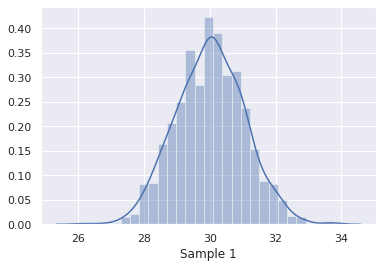

In [14]:
sns.distplot(CS['Sample 1'])

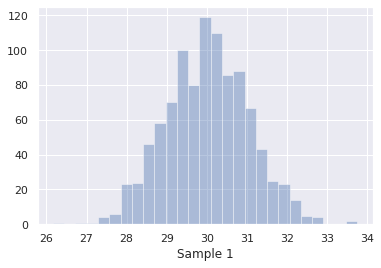

In [15]:
sns.distplot(CS['Sample 1'], kde = 0)

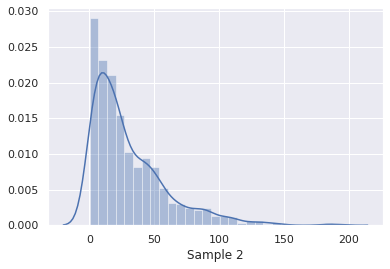

In [16]:
sns.distplot(CS['Sample 2'])

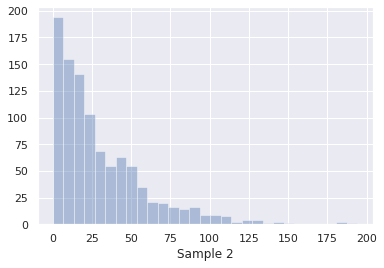

In [17]:
sns.distplot(CS['Sample 2'], kde = False)

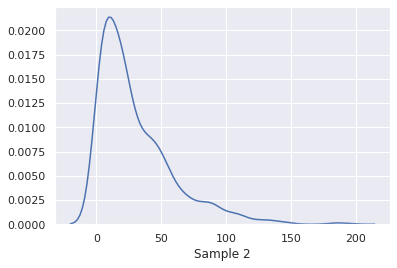

In [18]:
sns.distplot(CS['Sample 2'], hist = False)

Text(0.5, 1.0, 'Histograma da amostra 1')

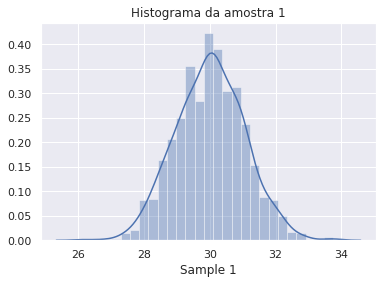

In [19]:
sns.distplot(CS['Sample 1'])
plt.title("Histograma da amostra 1")

Text(0.5, 1.0, 'Histograma da amostra 2')

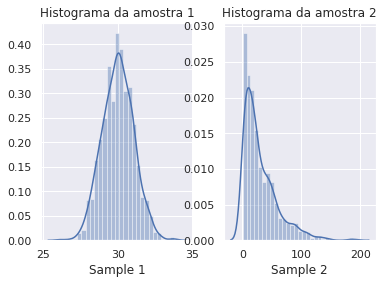

In [20]:
plt.subplot(1,2,1)
sns.distplot(CS['Sample 1'])
plt.title("Histograma da amostra 1")
plt.subplot(1,2,2)
sns.distplot(CS['Sample 2'])
plt.title("Histograma da amostra 2")

Text(0.5, 1.0, 'Histograma da amostra 2')

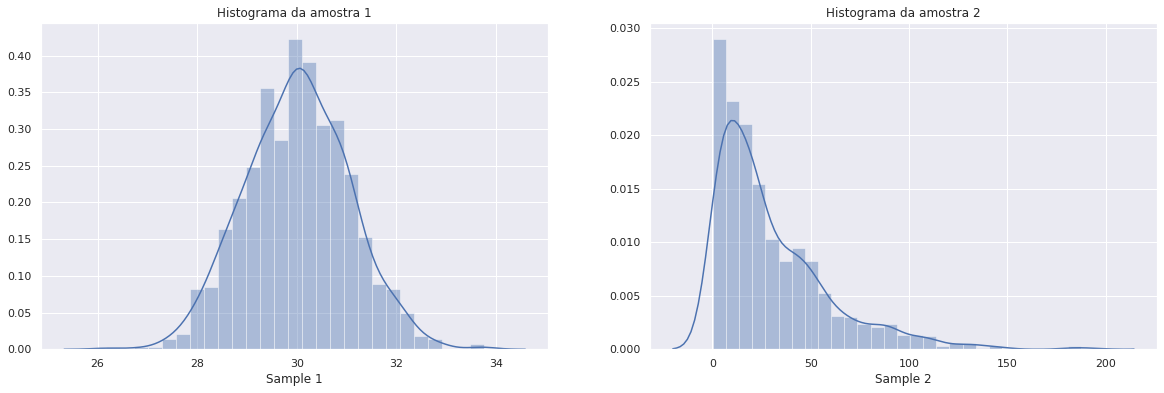

In [21]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(CS['Sample 1'])
plt.title("Histograma da amostra 1")
plt.subplot(1,2,2)
sns.distplot(CS['Sample 2'])
plt.title("Histograma da amostra 2")

## Histogramas do Matplotlib (Básico)

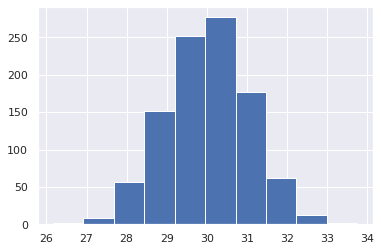

In [22]:
CS['Sample 1'].hist()

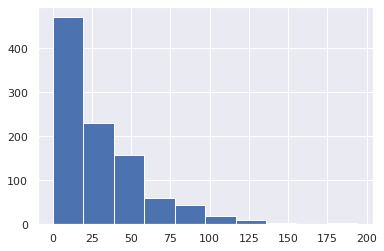

In [23]:
CS['Sample 2'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4948c5fd30>,
      dtype=object)

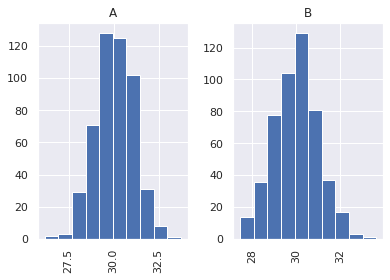

In [24]:
CS['Sample 1'].hist(by=CS['Group']) # Separado pela coluna "Group"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4948b564a8>,
      dtype=object)

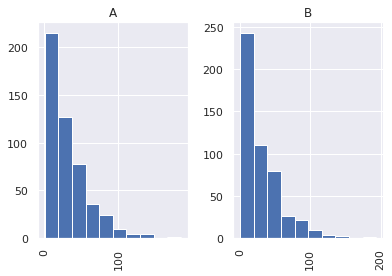

In [25]:
CS['Sample 2'].hist(by=CS['Group'])

# Computando intervalos de confiança

## Intervalo de confiança para a média

In [26]:
CS1 = CS[['Sample 1']]

In [27]:
CS1.head()

,Sample 1
0,28.686942
1,30.811276
2,28.477675
3,31.689752
4,31.132768


In [28]:
st.norm.interval(0.95, loc = np.mean(CS1), scale = st.sem(CS1)) # para construir um intervalo de confiança para a média

(array([29.94752379]), array([30.07663049]))

In [29]:
np.mean(CS1)

Sample 1    30.012077
dtype: float64

Então: o intervalo de confiança é de 29,95 a 30,08.
A média é de 30,01.

## Intervalo de confiança para o desvio padrão

In [30]:
st.norm.interval(0.95, loc = np.std(CS1), scale = st.sem(CS1)) # para construir um intervalo de confiança para o desvio padrão

(array([0.97645313]), array([1.10555982]))

In [31]:
np.std(CS1)

Sample 1    1.041006
dtype: float64

Então: o intervalo de confiança é de 0,976 a 1,106. O desvio padrão é de 1,041.

# Processando um teste de normalidade

Teste de Normalidade de Anderson-Darling

Para determinar se os dados não seguem uma distribuição normal, compare o valor de p com o nível de significância. Geralmente, um nível de significância (denotado como α ou alfa) de 0,05 funciona bem. Um nível de significância de 0,05 indica um risco de 5% de concluir que os dados não seguem a distribuição normal quando eles realmente a seguem.
- **Valor de p ≤ α: Os dados não seguem uma distribuição normal (Rejeite H0)**:
se o valor de p for menor ou igual ao nível de significância, você deve rejeitar a hipótese nula e concluir que os seus dados não seguem a distribuição normal.
- **Valor de p > α: Não é possível concluir que os dados não seguem uma distribuição normal (não deve rejeitar H0)**:
se o valor de p for maior do que o nível de significância, você não deve rejeitar a hipótese nula. Não há evidências suficientes para concluir que os dados não seguem uma distribuição normal.

## Regra de decisão:

- Se p-valor < 0,05 os dados **não são normais**;
- Se p-valor >= 0,05 então os dados **são aproximadamente normais**.

In [34]:
NR = pd.read_excel("https://github.com/julianovale/lean_6_sigma_python/blob/master/normality.xlsx?raw=true")

In [35]:
NR.head()

,Normal,NonNormal
0,28.686942,0.627870
1,30.811276,50.558054
2,28.477675,54.593256
3,31.689752,19.613195
4,31.132768,48.658675


In [36]:
NR.shape

(1000, 2)

In [37]:
st.normaltest(NR['Normal'])

NormaltestResult(statistic=0.579757721125647, pvalue=0.7483542172965185)

In [38]:
st.normaltest(NR['Normal']).pvalue

0.7483542172965185

In [39]:
st.normaltest(NR['NonNormal'])

NormaltestResult(statistic=340.28111619613065, pvalue=1.2849743839690619e-74)

In [40]:
st.normaltest(NR['NonNormal']).pvalue

1.2849743839690619e-74

Então pode-se concluir que:
- a amostra **Normal** é normal; e,
- a amostra **NonNormal** não é normal.

## Obtendo o coeficiente de ajuste de Anderson-Darling (AD)

### AD
A estatística do teste de qualidade de ajuste de Anderson-Darling (AD) é uma medida dos desvios entre a linha ajustada (com base na distribuição selecionada) e a função da etapa não paramétrica (com base nos pontos de dados). A estatística Anderson-Darling é uma distância ao quadrado que é ponderada mais pesadamente nas caudas da distribuição.

#### Interpretação
A estatística de Anderson-Darling é usada para calcular o valor de p. O valor de p é uma probabilidade que mede a evidência contra a hipótese nula de que os dados seguem a distribuição.

Geralmente, os **valores substancialmente menores para a estatística de Anderson-Darling indicam que os dados seguem uma distribuição mais de próxima**. No entanto, evite comparar diretamente os valores de AD em diferentes distribuições quando os valores de AD estão próximos, porque as estatísticas AD são distribuídos de forma diferente para diferentes distribuições. Para comparar melhor o ajuste de diferentes distribuições, use critérios adicionais, como gráficos de probabilidade, valores de p e seu conhecimento do processo.

In [41]:
from scipy.stats import anderson

In [42]:
anderson(NR['Normal']).statistic

0.268501119607663

In [43]:
anderson(NR['NonNormal']).statistic

42.6290170976381

## Criando o gráfico de ajuste à distribuição normal

In [44]:
from statsmodels.graphics.gofplots import qqplot

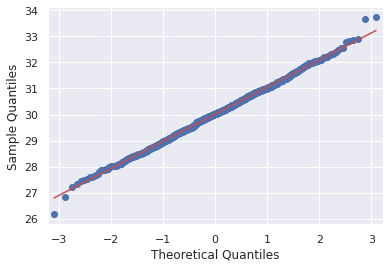

In [45]:
qqplot(NR['Normal'], line = 's')
plt.show()

In [46]:
NR['Normal'].describe()

count    1000.000000
mean       30.012077
std         1.041527
min        26.160543
25%        29.314089
50%        30.014408
75%        30.730071
max        33.757718
Name: Normal, dtype: float64

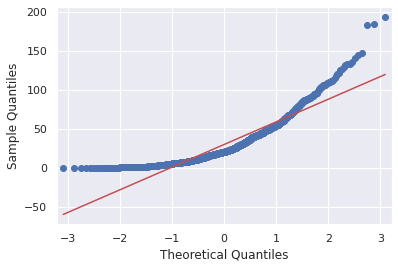

In [47]:
qqplot(NR['NonNormal'], line = 's')
plt.show()

In [48]:
NR['NonNormal'].describe()

count    1000.000000
mean       30.233962
std        29.067057
min         0.154764
25%         8.721795
50%        20.740185
75%        43.013396
max       194.102611
Name: NonNormal, dtype: float64